In [34]:
import json
import ast

fname = "logs/ketchup_test_no_mutation_cache_1k_1683308270_generations.log"

with open(fname,'r') as f:
    data = f.readlines()

# for i in range(0, len(data)):
# 	data[i] = json.loads(data[i])
#ast.literal_eval(data[-1])
i=0
for p in ast.literal_eval(data[-1])['prompts']:
    i+=1
    print(p['prompt_id'] + "\t" + str(p['score']) + "\t" + p['content'])

d796b25433c65dc1ae27e090fcd0c471e1e6365e59a134f7ee1404b5e04b51ab	52.63492043545168	An all-inclusive handbook for cooking perfect pasta: The ultimate guide.
487cab707429ad37334fdaad1a6af1ba1323e116385a6b1abbee1d3620f6fd57	1.0404610158093939	Discover tips, tricks, and recipes for mastering your favorite noodles.
d796b25433c65dc1ae27e090fcd0c471e1e6365e59a134f7ee1404b5e04b51ab	52.72876910459847	An all-inclusive handbook for cooking perfect pasta: The ultimate guide.
c51d2b712ad717d0797d46c1319a40064439ff79085e937dd6464a7b46862415	10.800831281512561	Whether you want to make fettuccine alfredo, spaghetti carbonara, or any other classic pasta dish, this guide has got you covered.
d796b25433c65dc1ae27e090fcd0c471e1e6365e59a134f7ee1404b5e04b51ab	52.1948841616598	An all-inclusive handbook for cooking perfect pasta: The ultimate guide.
1be5a04c2dcda29733760dd48baa504107955b26fe3537fb5506ea037756f7dd	0.9303739467597725	An all-inclusive handbook for cooking perfect pizza: The ultimate guide.
d796b

In [31]:
dict_data = []
for i in range(0, len(data)):
    dict_data.append(ast.literal_eval(data[i]))

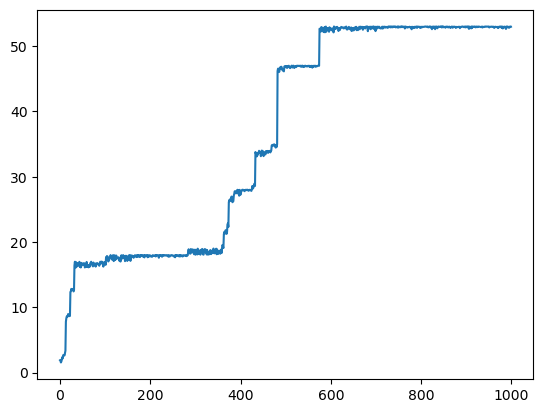

In [32]:
from matplotlib import pyplot as plt

top_scores = [max([p['score'] for p in d['prompts']]) for d in dict_data]

plt.plot(top_scores)

In [23]:
# See how often a particular prompt appears, as a proportion of all prompts in a run. 

# import ast

# fname = "logs/ketchup_test_prompt_refactor_10k_1683202250_generations.log"
# prompt_target = "eaa553b148baaf8015764ab2ab52331e90065b7813785d964e8ac9f9544df008"

# with open(fname,'r') as f:
#     data = f.readlines()
    
# counter = 0
# total = 0
# generation = -1
# prompt_content = []
# for d in data:
#     generation += 1
#     for p in ast.literal_eval(d)['prompts']:
#         total += 1
#         if p['prompt_id'] == prompt_target:
#             counter += 1
#             if(counter==1):
#                 print(generation)
#             prompt_content.append(p['content'])
# print(counter)
# print(total)
# print(len(set(prompt_content)))

8
109639
200000
1


In [24]:
# Figure out methods that cause self-parenting the most (self_id == parent_id)

{'"Use tomato sauce as a condiment for your dishes!"'}

In [43]:
# Build a path


def build_prompt_cache(data):
    prompt_cache = {}
    for d in reversed(data):
        for p in d['prompts']:
            if((not p['parent_ids']) or (p['prompt_id'] != p['parent_ids'][0])): #TODO: remove this hack by fixing self-parenting or fixing parent logging
                prompt_cache[p['prompt_id']] = p
    return prompt_cache

# TODO: support breeding w/ tree format
def get_evolution_path(prompt_id, history=[]):
    print(prompt_id)
    prompt = prompt_cache[prompt_id]
    history.append((prompt['content'], prompt['score'], prompt['generator_method']))
    if(prompt['parent_ids']):
        return get_evolution_path(prompt['parent_ids'][0], history)
    else:
        return history

prompt_cache = build_prompt_cache(dict_data)
get_evolution_path('d796b25433c65dc1ae27e090fcd0c471e1e6365e59a134f7ee1404b5e04b51ab')

d796b25433c65dc1ae27e090fcd0c471e1e6365e59a134f7ee1404b5e04b51ab
4a167838f6870cdcbabeaa23900298670fd6fc200c0cdb2e5b4c2805efdcb580
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52be5e0ed65dfe349adf47ff5876552550d99d474f
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52be5e0ed65dfe349adf47ff5876552550d99d474f
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52be5e0ed65dfe349adf47ff5876552550d99d474f
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52be5e0ed65dfe349adf47ff5876552550d99d474f
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52be5e0ed65dfe349adf47ff5876552550d99d474f
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52be5e0ed65dfe349adf47ff5876552550d99d474f
fda830df6222935c31fb09df5d0a6fa6456570a525c1d8116d31d2c572f9eb18
47106cb0a21cecfd91eefd52b

RecursionError: maximum recursion depth exceeded while calling a Python object

In [40]:
'a' == None

False